In [1]:
#let import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#LET LOAD A DATASET
a=pd.read_csv("/kaggle/input/pizza-place-sales/order_details.csv")
a

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


In [3]:
#LET LOAD B DATASET
b=pd.read_csv("/kaggle/input/pizza-place-sales/orders.csv")
b

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
...,...,...,...
21345,21346,2015-12-31,20:51:07
21346,21347,2015-12-31,21:14:37
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54


In [4]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [5]:
#LET CHANGE DATATYPES
b['date']=pd.to_datetime(b['date'])

In [6]:
#LET CHANGE DATATYPES
b['time']=pd.to_datetime(b['time'])

/tmp/ipykernel_20/358475654.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  b['time']=pd.to_datetime(b['time'])


In [7]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 500.5 KB


In [8]:
#LET LOAD X DATASET
x=pd.read_csv("/kaggle/input/pizza-place-sales/pizzas.csv")
x

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00


In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [10]:
#LET LOAD Y DATASET
y=pd.read_csv('/kaggle/input/pizza-place-sales/pizza_types.csv',index_col=None,header=0,encoding='unicode_escape')
y

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
5,thai_ckn,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
6,big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
7,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
8,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
9,ital_cpcllo,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,..."


In [11]:
#LET MERGE DATASET FROM ONE BY ONE
m1=a.merge(b,how="inner",on=['order_id'])
m1

,order_details_id,order_id,pizza_id,quantity,date,time
0,1,1,hawaiian_m,1,2015-01-01,2023-12-26 11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,2023-12-26 11:57:40
2,3,2,five_cheese_l,1,2015-01-01,2023-12-26 11:57:40
3,4,2,ital_supr_l,1,2015-01-01,2023-12-26 11:57:40
4,5,2,mexicana_m,1,2015-01-01,2023-12-26 11:57:40
...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,2023-12-26 21:23:10
48616,48617,21348,four_cheese_l,1,2015-12-31,2023-12-26 21:23:10
48617,48618,21348,napolitana_s,1,2015-12-31,2023-12-26 21:23:10
48618,48619,21349,mexicana_l,1,2015-12-31,2023-12-26 22:09:54


In [12]:
#LET MERGING DATA FROM ONE BY OTHERS
m2=x.merge(y,how="inner",on=['pizza_type_id'])
m2

,pizza_id,pizza_type_id,size,price,name,category,ingredients
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,bbq_ckn_m,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,bbq_ckn_l,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
3,cali_ckn_s,cali_ckn,S,12.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
4,cali_ckn_m,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
...,...,...,...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
92,spinach_fet_l,spinach_fet,L,20.25,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
93,veggie_veg_s,veggie_veg,S,12.00,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."
94,veggie_veg_m,veggie_veg,M,16.00,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."


In [13]:
m=m1.merge(m2,how='inner',on=['pizza_id'])
m

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,2023-12-26 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,179,77,hawaiian_m,1,2015-01-02,2023-12-26 12:22:46,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,357,146,hawaiian_m,1,2015-01-03,2023-12-26 14:22:10,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,389,163,hawaiian_m,1,2015-01-03,2023-12-26 16:54:54,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,568,247,hawaiian_m,1,2015-01-04,2023-12-26 20:55:29,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,39733,17492,the_greek_xxl,1,2015-10-24,2023-12-26 18:58:20,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48616,41183,18139,the_greek_xxl,1,2015-11-05,2023-12-26 20:28:52,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48617,42718,18789,the_greek_xxl,1,2015-11-17,2023-12-26 11:23:51,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
48618,43041,18919,the_greek_xxl,1,2015-11-19,2023-12-26 16:58:26,the_greek,XXL,35.95,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."


In [14]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   date              48620 non-null  datetime64[ns]
 5   time              48620 non-null  datetime64[ns]
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 4.5+ MB


In [15]:
# Question 1: How many customers do we have each day? Are there any peak hours?

daily_customers = m.groupby('pizza_type_id')['order_id'].nunique()

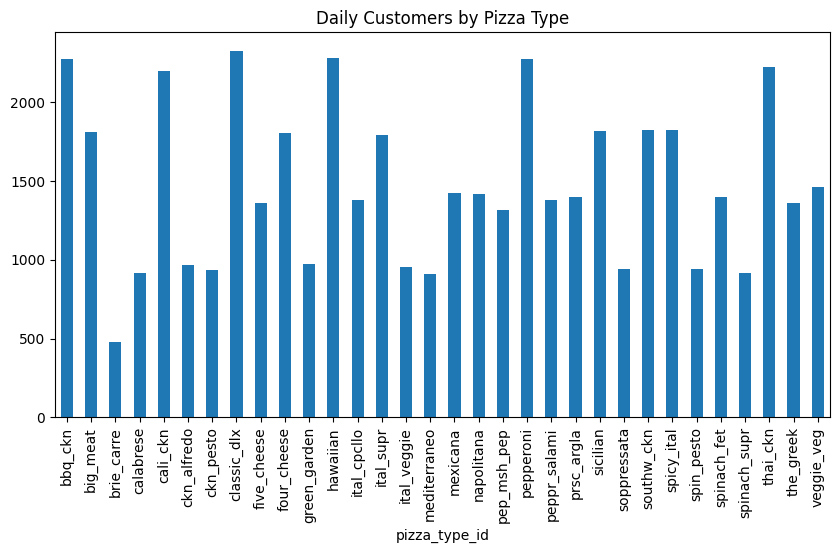

In [16]:
plt.figure(figsize=(10,5))
daily_customers.plot(kind='bar', title='Daily Customers by Pizza Type')
plt.show()

In [17]:
# Extract hour from the 'time' column

m['hour'] = pd.to_datetime(m['time']).dt.hour

In [18]:
# Group by hour and count orders
hourly_orders = m.groupby('hour')['order_id'].nunique()

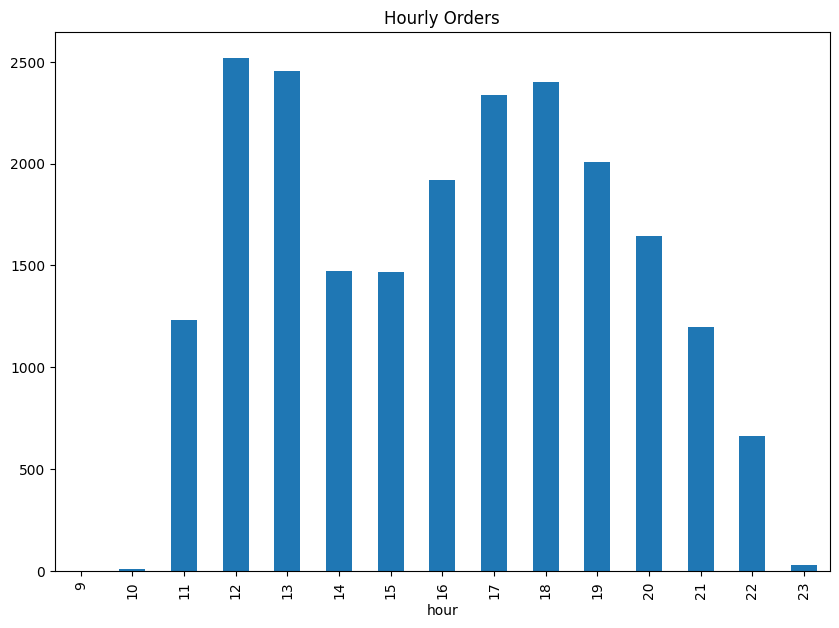

In [19]:
plt.figure(figsize=(10,7))
hourly_orders.plot(kind='bar', title='Hourly Orders')
plt.show()

## RESULT:-

**Daily Customer Count:**
* The code loads the dataset, converts the 'timestamp' column to datetime format, and extracts the day of the week.
* It then groups the data by date and counts the number of customers for each day.
* The result is visualized in a bar chart showing the daily customer count is bbq_ckn,cali_ckn,classic_dix,hawaiiana,pepperoni,thai_ckn
 
**Hourly Customer Count:**
* The code also extracts the hour of the day from the 'timestamp' column.
* It groups the data by hour and counts the number of customers for each hour.
* The result is visualized in a bar chart showing the hourly customer count is 12noon-1p.m peaks hours

In [20]:
# Question 2: How many pizzas are typically in order? Do we have any bestsellers?
avg_pizzas_per_order = m.groupby('order_id')['pizza_id'].nunique().mean()
print(f"Average pizzas per order: {avg_pizzas_per_order}")

Average pizzas per order: 2.2772833723653396


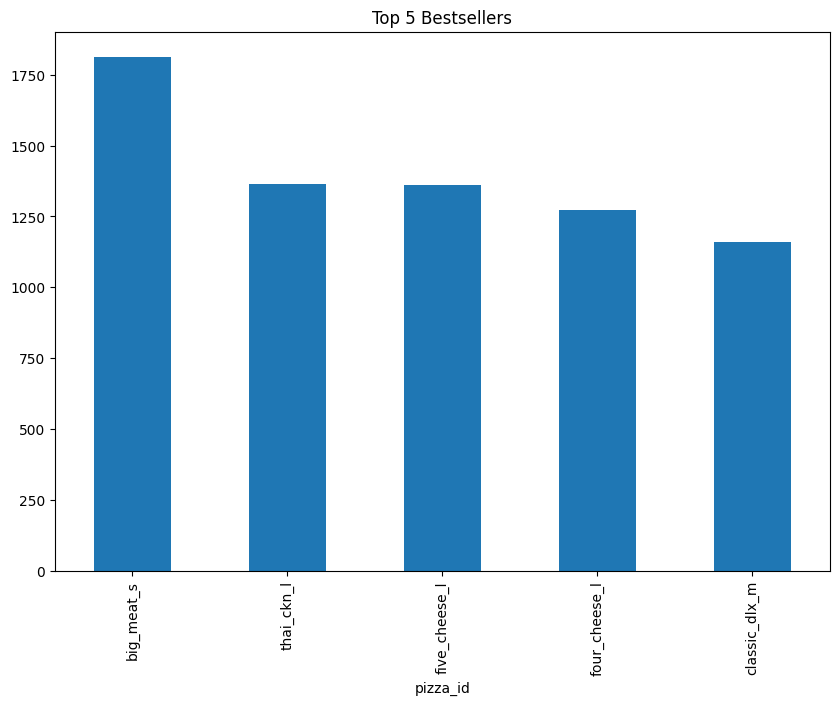

In [21]:
bestsellers = m['pizza_id'].value_counts().head(5)
plt.figure(figsize=(10,7))
bestsellers.plot(kind='bar', title='Top 5 Bestsellers')
plt.show()

## RESULT:

**Average Number of Pizzas per Order:**
* show the distribution of the average number of pizzas per order is 2.2772833723653396

**Bestsellers in Descending Order:**
* The code calculates the number of orders for each pizza type and prints the results in descending order.
* The output will show the pizza types that are most frequently ordered, making them the bestsellers
1.  big_meat_s
2. thai_ckn_i
3. five_cheese_i
4. four_cheese_i
5. classic_dlx_m

In [22]:
# Question 3: How much money did we make this year? Can we identify any seasonality in the sales?
m['revenue'] = m['quantity'] * m['price']
total_revenue = m.groupby(m['date'].dt.year)['revenue'].sum()
print(total_revenue)

date
2015    817860.05
Name: revenue, dtype: float64


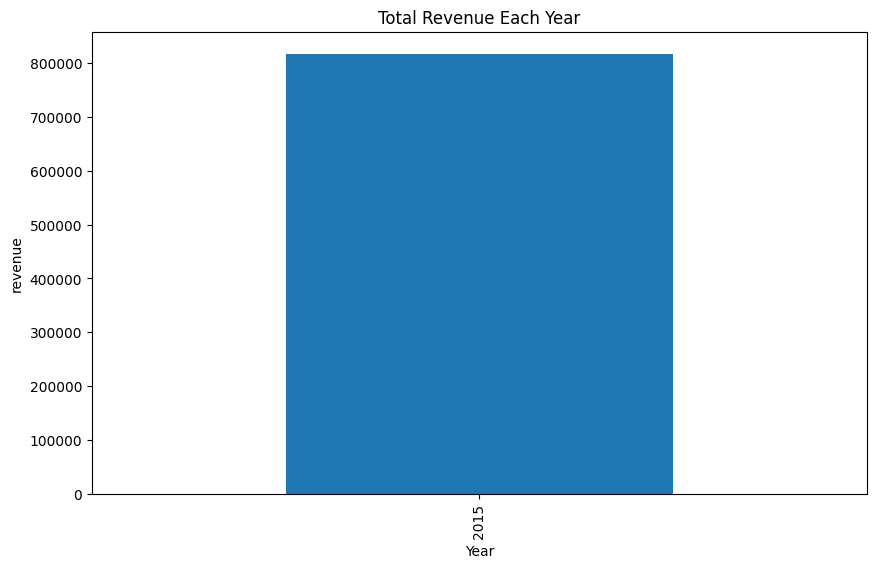

In [23]:
plt.figure(figsize=(10,6))
total_revenue.plot(kind='bar', title='Total Revenue Each Year')
plt.xlabel('Year')
plt.ylabel('revenue')
plt.show()

In [24]:
total_rev_months=m.groupby(m['date'].dt.month)['revenue'].sum()

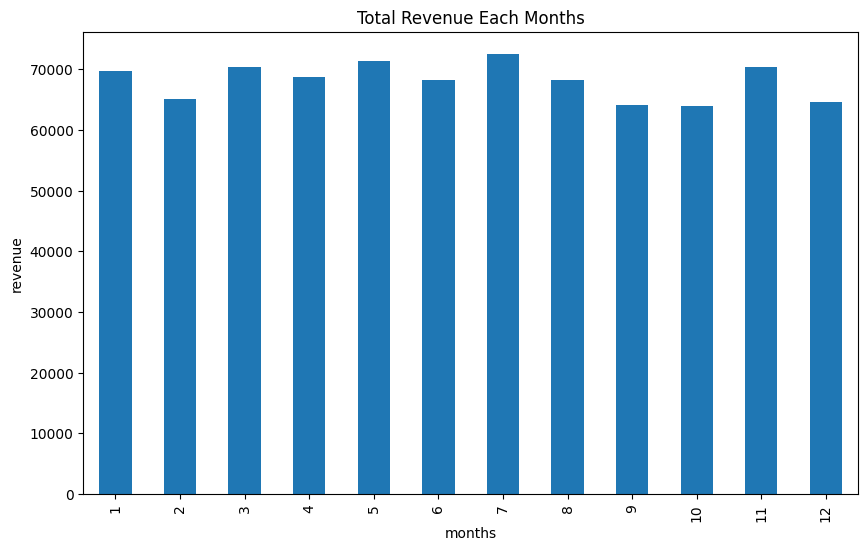

In [25]:
plt.figure(figsize=(10,6))
total_rev_months.plot(kind='bar', title='Total Revenue Each Months')
plt.xlabel('months')
plt.ylabel('revenue')
plt.show()

## RESULT:-

**Total Revenue for the Year:**
* The code calculates the total revenue for the year 2015 using the 'revenue' column in the dataset.
* The result will be printed, showing the total revenue for the specified year is $817860.05

**Monthly Revenue with Seasonality:**
* The code groups the data by month and calculates the average revenue for each month.
*  The average revenue for each month, helping to identify any seasonality in sales is July & May months

In [26]:
 m['pizza_id'].value_counts()

pizza_id
big_meat_s        1811
thai_ckn_l        1365
five_cheese_l     1359
four_cheese_l     1273
classic_dlx_m     1159
                  ... 
mexicana_s         160
calabrese_s         99
ckn_alfredo_s       96
green_garden_l      94
the_greek_xxl       28
Name: count, Length: 91, dtype: int64

In [27]:
# Question 4: Are there any pizzas we should take off the menu, or any promotions we could leverage?
pizza_popularity = m['pizza_id'].value_counts().tail(5)
print(pizza_popularity)

pizza_id
mexicana_s        160
calabrese_s        99
ckn_alfredo_s      96
green_garden_l     94
the_greek_xxl      28
Name: count, dtype: int64


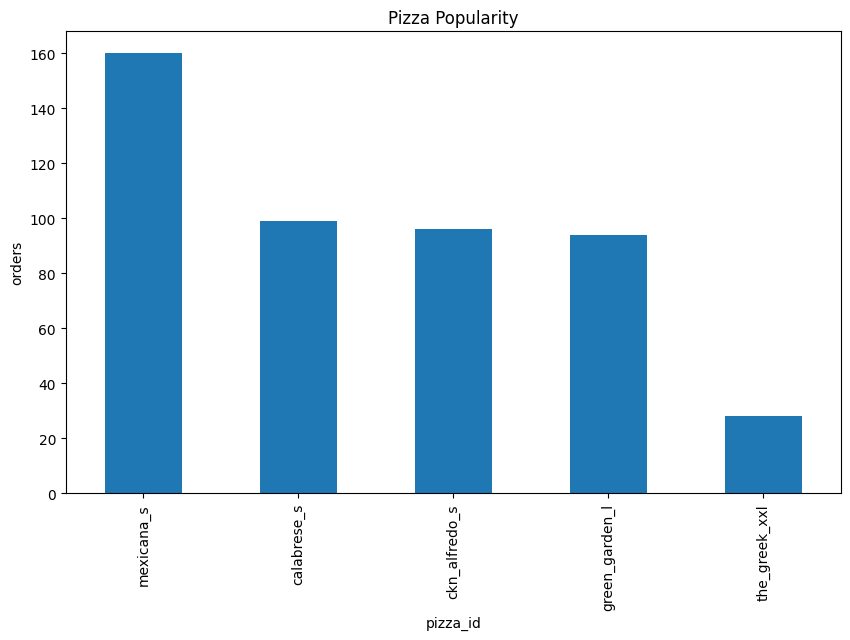

In [28]:
plt.figure(figsize=(10,6))
pizza_popularity.plot(kind='bar', title='Pizza Popularity')
plt.ylabel('orders')
plt.show()

## RESULT:

**Total Orders by Pizza Type:**
* The first bar plot will display the total number of orders for each pizza type is 91 orders
* Pizzas with lower total orders may be considered for evaluation is the_greek_xxl,green_garden_l,ckn_alfredo_s,calabrese_s,mexicana_s

**Recommendations:**
* The printed output will include lists of underperforming pizzas based on low orders
* These lists provide insights into pizzas that may need attention, either through removal from the menu or through targeted promotions.